In [10]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
import glob

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D,
    BatchNormalization, GlobalAveragePooling2D
)
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image

import warnings
warnings.filterwarnings('ignore')


In [23]:
import cv2
import glob
import numpy as np

path_Yes = "dataset/brain_tumor_dataset/yes/*"
path_No = "dataset/brain_tumor_dataset/no/*"

tumor = []
no_tumor = []
random_state = 42

for file in glob.iglob(path_Yes):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    tumor.append((img, 1))

for file in glob.iglob(path_No):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    no_tumor.append((img, 0))

all_data = tumor + no_tumor
np.random.seed(random_state)
np.random.shuffle(all_data)

data = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])


In [34]:
import cv2
import glob
import matplotlib.pyplot as plt

tumor = []
no_tumor = []

path_Yes = "dataset/brain_tumor_dataset/yes/*.jpg"  # or *.png based on your images
path_No = "dataset/brain_tumor_dataset/no/*.jpg"

for file in glob.glob(path_Yes):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        tumor.append((img, 1))

for file in glob.glob(path_No):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        no_tumor.append((img, 0))

print("Tumor images:", len(tumor))
print("No Tumor images:", len(no_tumor))


Tumor images: 139
No Tumor images: 81


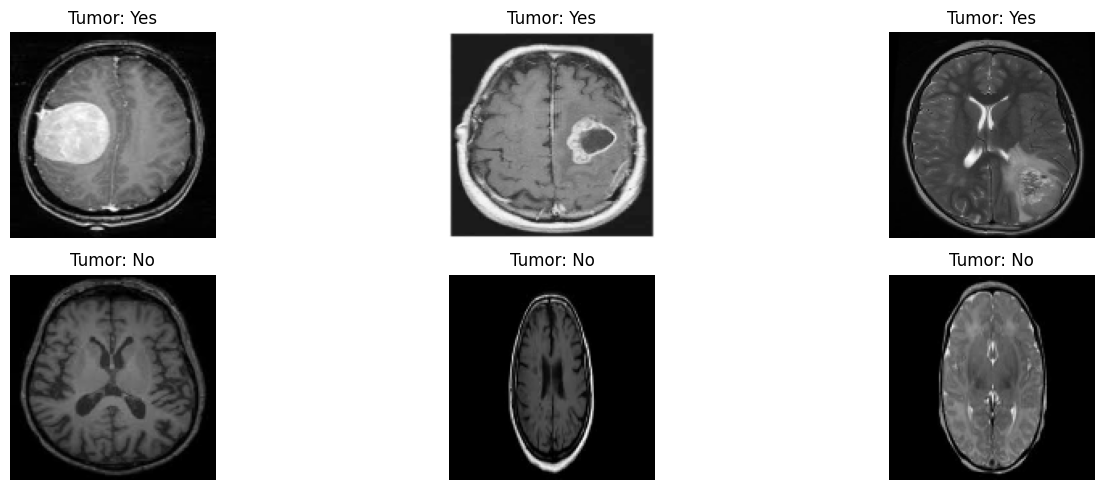

In [35]:
if len(tumor) > 0 and len(no_tumor) > 0:
    plt.figure(figsize=(15, 5))
    for i in range(min(3, len(tumor))):
        plt.subplot(2, 3, i + 1)
        plt.imshow(tumor[i][0])
        plt.title("Tumor: Yes")
        plt.axis('off')
    for i in range(min(3, len(no_tumor))):
        plt.subplot(2, 3, i + 4)
        plt.imshow(no_tumor[i][0])
        plt.title("Tumor: No")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No images loaded. Check the file paths.")


In [39]:
import cv2
import numpy as np
import glob

tumor = []
no_tumor = []

path_Yes = "dataset/brain_tumor_dataset/yes/*.jpg"
path_No = "dataset/brain_tumor_dataset/no/*.jpg"

# Load tumor images (label = 1)
for file in glob.glob(path_Yes):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        tumor.append((img, 1))

# Load no_tumor images (label = 0)
for file in glob.glob(path_No):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        no_tumor.append((img, 0))

# Combine and shuffle data
all_data = tumor + no_tumor
np.random.shuffle(all_data)

# Split into data and labels
data = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])

print("✅ Loaded", len(data), "images.")
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
print("Unique labels:", np.unique(labels))


✅ Loaded 220 images.
Data shape: (220, 128, 128, 3)
Labels shape: (220,)
Unique labels: [0 1]


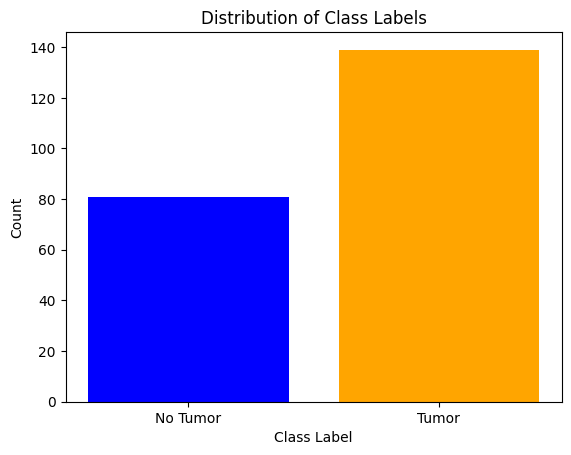

In [40]:
import matplotlib.pyplot as plt

unique_labels, label_counts = np.unique(labels, return_counts=True)

plt.bar(unique_labels, label_counts, color=['blue', 'orange'])
plt.xticks(unique_labels, ['No Tumor', 'Tumor'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.show()


In [42]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

# Normalize pixel values (scale 0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Minimum value of the scaled data:", x_train.min())
print("Maximum value of the scaled data:", x_train.max())



Minimum value of the scaled data: 0.0
Maximum value of the scaled data: 1.0


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten before passing to Dense layer
model.add(Flatten())

# Dense Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer (binary classification)
model.add(Dense(1, activation='sigmoid'))


In [44]:
model. compile(optimizer= 'Adam', loss= 'binary_crossentropy', metrics=['accuracy' ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Define a custom callback to stop training when accuracy > 99%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

# Create an instance of the callback
back = myCallback()

# Fit the model with training data
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[back],
    class_weight={0: 1, 1: 2}  # Optional: give more weight to tumor class (1)
)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - accuracy: 0.5171 - loss: 0.9780 - val_accuracy: 0.7222 - val_loss: 0.5106
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.6474 - loss: 0.8122 - val_accuracy: 0.7778 - val_loss: 0.4911
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.6789 - loss: 0.6960 - val_accuracy: 0.8611 - val_loss: 0.4272
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.7474 - loss: 0.7280 - val_accuracy: 0.7778 - val_loss: 0.4692
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.7426 - loss: 0.6062 - val_accuracy: 0.8611 - val_loss: 0.4095
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.7925 - loss: 0.6145 - val_accuracy: 0.7778 - val_loss: 0.4758
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.7927 - loss: 0.6275 - val_accuracy: 0.8611 - val_loss: 0.3832
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.8634 - loss: 0.4807 - val_accuracy: 0.8333 - v

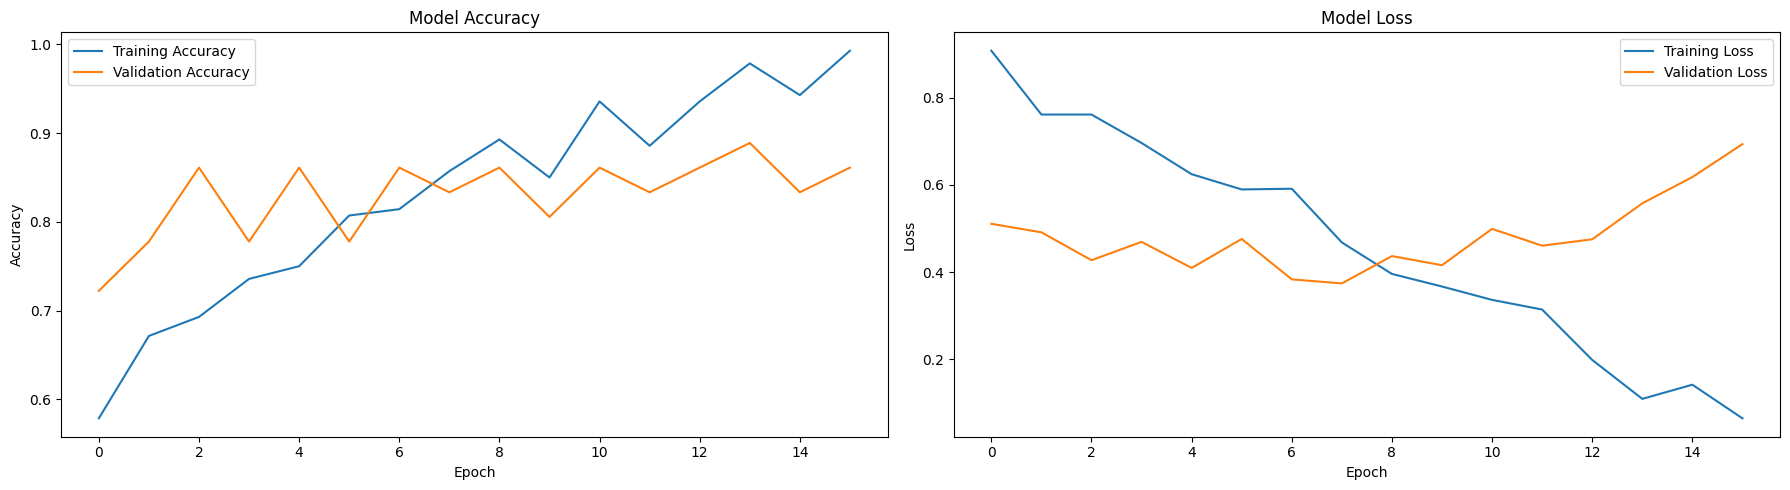

In [46]:
import matplotlib.pyplot as plt

# Plot Accuracy and Loss
plt.figure(figsize=(18, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [48]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8674 - loss: 0.4926
Test Loss: 0.49209344387054443
Test Accuracy: 0.8636363744735718


In [54]:
# Save using the native Keras format
model.save("brain_tumor_model.keras")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        20
           1       0.80      1.00      0.89        24

    accuracy                           0.86        44
   macro avg       0.90      0.85      0.86        44
weighted avg       0.89      0.86      0.86        44

Confusion Matrix:
 [[14  6]
 [ 0 24]]


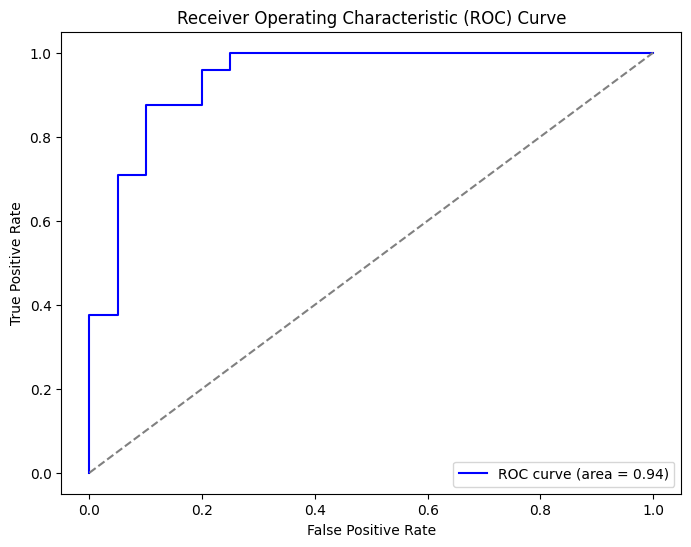

In [53]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities
y_pred_prob = model.predict(x_test)

# Convert probabilities to binary class predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
